In [34]:
from datetime import datetime, timedelta
import pandas as pd
import statsmodels.api as sm
import yfinance as yf
import pandas_datareader.data as reader
import json
import matplotlib.pyplot as plt
import numpy as np


In [35]:

def get_alpha(ticker=['FDGRX'],start='2019-07-01', end=datetime.now()):
    factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)

    print(ticker)
    df = yf.download(ticker, start=start, end=end, progress=False)['Adj Close'].pct_change()
    mtl_ret = df.resample("ME").agg(lambda x: (x+1).prod() - 1)
    factors = factors[0]
    if len(factors) != len(mtl_ret):
        print(len(factors), len(mtl_ret))
        mtl_ret = mtl_ret.iloc[:-2]
    mtl_ret.index = factors.index

    merge = pd.merge(mtl_ret, factors, on="Date")
    merge[['Mkt-RF', "SMB", "HML", "RF"]] = merge[['Mkt-RF', "SMB", "HML", "RF"]]/100

    if len(ticker) == 1:
        merge[f'{ticker[0]}-RF'] = merge["Adj Close"] - merge.RF
        y = merge["Adj Close"]
    else:
        for i in ticker:
            merge[f'{i}-RF'] = merge[i] - merge.RF
        y = merge.iloc[:, -len(ticker):]

    X = merge[["Mkt-RF", "SMB", "HML"]]
    X_sm = sm.add_constant(X)
    X_sm.head()
    model = sm.OLS(y, X_sm)
    res = model.fit()
    res_table = res.summary().tables
    alpha = float(res_table[1].data[1][1].strip())
    return alpha




In [244]:
da_str = "2017-01-01"
dt = pd.to_datetime(da_str)

with open("stock_list.json", "r") as f:
    dicts_stock_list = json.load(f)
SP500_list = list(pd.read_csv("../constituents.csv")['Symbol'])

for index, i in enumerate(SP500_list[:]):
    a = yf.download(i, progress=False)
    if a.index[0] >= dt:
        SP500_list.remove(i)
        print(index, i, a.index[0])

dicts_stock_list[f"SP500_{da_str[:4]}{da_str[5:7]}{da_str[-2:]}"] = SP500_list
with open("stock_list.json", "w") as f:
    json.dump(dicts_stock_list, f, indent=4)

11 ABNB 2020-12-10 00:00:00
87 CARR 2020-03-19 00:00:00
124 CEG 2022-01-19 00:00:00
129 CTVA 2019-05-24 00:00:00
154 DOW 2019-03-20 00:00:00
203 FOXA 2019-03-12 00:00:00
204 FOX 2019-03-13 00:00:00
210 GEHC 2022-12-15 00:00:00
211 GEV 2024-04-01 00:00:00
271 KVUE 2023-05-04 00:00:00
357 OTIS 2020-03-19 00:00:00
418 SOLV 2024-04-01 00:00:00
455 UBER 2019-05-10 00:00:00
466 VLTO 2023-10-04 00:00:00


In [ ]:
'''deleted list
11 ABNB 2020-12-10 00:00:00
87 CARR 2020-03-19 00:00:00
124 CEG 2022-01-19 00:00:00
129 CTVA 2019-05-24 00:00:00
140 DAY 2018-04-26 00:00:00
154 DOW 2019-03-20 00:00:00
203 FOXA 2019-03-12 00:00:00
204 FOX 2019-03-13 00:00:00
210 GEHC 2022-12-15 00:00:00
211 GEV 2024-04-01 00:00:00
249 IR 2017-05-12 00:00:00
259 INVH 2017-02-01 00:00:00
271 KVUE 2023-05-04 00:00:00
319 MRNA 2018-12-07 00:00:00
357 OTIS 2020-03-19 00:00:00
418 SOLV 2024-04-01 00:00:00
455 UBER 2019-05-10 00:00:00
466 VLTO 2023-10-04 00:00:00
472 VICI 2018-01-02 00:00:00
'''

In [25]:
with open("stock_list.json", "r") as f:
    # SP500_list = json.load(f)[f"SP500_{da_str[:4]}{da_str[5:7]}{da_str[-2:]}"]
    SP500_list = json.load(f)[f"SP500_20170101"]
dicts = {}
col_name = 'Alpha_2017_2021'
for i in SP500_list:
    alpha = get_alpha(ticker=[i], start="2017-01-01", end="2021-12-31")
    dicts[i] = alpha

sorted_dict_desc = dict(sorted(dicts.items(), key=lambda item: item[1], reverse=True))
print(sorted_dict_desc)
df = pd.DataFrame.from_dict(sorted_dict_desc, orient='index', columns=[col_name])
df.to_csv(f"Factor_{col_name}.csv")

/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MMM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AOS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ABT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ABBV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ACN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ADBE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AES']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AFL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['A']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['APD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AKAM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ALB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ARE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ALGN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ALLE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LNT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ALL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GOOGL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GOOG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMZN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMCR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AEE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AAL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AEP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AXP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AIG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AWK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AME']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMGN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['APH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ADI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ANSS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AON']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['APA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AAPL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AMAT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['APTV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ACGL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ADM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ANET']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AJG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AIZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['T']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ATO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ADSK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ADP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AZO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AVB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AVY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AXON']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BKR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BALL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BAC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BBWI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BAX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BDX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BBY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BIO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TECH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BIIB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BLK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BKNG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BWA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BXP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BSX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BMY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['AVGO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BRO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BLDR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CDNS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CZR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CPT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CPB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['COF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CAH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KMX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CCL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CTLT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CAT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CBOE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CBRE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CDW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['COR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CNC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CNP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CHRW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CRL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SCHW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CHTR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CVX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CMG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CHD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CINF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CTAS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CSCO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['C']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CFG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CLX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CME']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CMS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CTSH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CMCSA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CMA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CAG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['COP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ED']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['STZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['COO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CPRT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GLW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CPAY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CSGP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['COST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CTRA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CCI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CSX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CMI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CVS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DHR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DRI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DVA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DECK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DAL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DVN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DXCM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FANG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DLR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DFS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DLTR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['D']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DPZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DOV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DHI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DTE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DUK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EMN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ETN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EBAY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ECL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EIX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ELV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LLY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EMR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ENPH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ETR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EOG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EPAM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EQT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EFX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EQIX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EQR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ESS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ETSY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EVRG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ES']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EXC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EXPE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EXPD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['EXR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['XOM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FFIV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FDS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FICO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FAST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FRT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FDX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FIS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FITB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FSLR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FMC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['F']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FTNT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FTV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['BEN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['FCX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GRMN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GEN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GNRC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GIS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GPC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GILD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GPN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HAL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HIG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HAS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HCA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DOC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HSIC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HSY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HES']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HPE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HLT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HOLX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HON']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HRL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HWM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HPQ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HUBB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HUM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HBAN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['HII']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IBM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IEX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IDXX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ITW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ILMN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['INCY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PODD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['INTC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ICE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IFF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IPG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['INTU']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ISRG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IVZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IQV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['IRM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JBHT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JBL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JKHY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['J']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JNJ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JCI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JPM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['JNPR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['K']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KDP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KEY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KEYS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KMB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KIM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KMI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KLAC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KHC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['KR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LHX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LRCX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LVS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LDOS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LEN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LIN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LYV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LKQ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LMT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['L']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LOW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LULU']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LYB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MTB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MRO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MPC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MKTX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MAR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MMC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MLM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MAS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MTCH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MKC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MCD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MCK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MDT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MRK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['META']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MET']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MTD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MGM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MCHP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MU']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MSFT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MAA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MHK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MOH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TAP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MDLZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MPWR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MNST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MCO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MOS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MSI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['MSCI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NDAQ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NTAP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NFLX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NEM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NWSA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NWS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NEE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NKE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NDSN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NSC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NTRS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NOC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NCLH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NRG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NUE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NVDA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NVR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NXPI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ORLY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['OXY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ODFL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['OMC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ON']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['OKE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ORCL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PCAR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PKG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PANW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PARA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PAYX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PAYC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PYPL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PNR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PEP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PFE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PCG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PSX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PNW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PNC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['POOL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PPG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PPL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PFG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PGR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PLD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PRU']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PEG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PTC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PSA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PHM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['QRVO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['PWR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['QCOM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DGX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RJF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RTX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['O']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['REG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['REGN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RSG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RMD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RVTY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RHI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ROK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ROL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ROP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ROST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['RCL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SPGI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['CRM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SBAC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SLB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['STX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SRE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['NOW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SHW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SPG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SWKS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SJM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SNA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['LUV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SWK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SBUX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['STT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['STLD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['STE']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SYK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SMCI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SYF']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SNPS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['SYY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TMUS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TROW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TTWO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TPR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TRGP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TGT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TEL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TDY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TFX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TER']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TSLA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TXN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TXT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TMO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TJX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TSCO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TDG']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TRV']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TRMB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TFC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TYL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['TSN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['USB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UDR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ULTA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UNP']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UAL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UPS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['URI']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UNH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['UHS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VLO']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VTR']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VRSN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VRSK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VZ']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VRTX']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VTRS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['V']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['VMC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WRB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['GWW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WAB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WBA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WMT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['DIS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WBD']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WAT']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WEC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WFC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WELL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WST']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WDC']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WRK']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WY']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WMB']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WTW']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['WYNN']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['XEL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['XYL']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['YUM']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ZBRA']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ZBH']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)
/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/336546633.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  factors = reader.DataReader("F-F_Research_Data_Factors", "famafrench", start=start, end=end)


['ZTS']
{'ENPH': 0.1019, 'ETSY': 0.0375, 'AXON': 0.0332, 'TSLA': 0.0328, 'MTCH': 0.0291, 'LRCX': 0.0284, 'GNRC': 0.0265, 'FTNT': 0.026, 'DXCM': 0.0239, 'DECK': 0.0233, 'PODD': 0.023, 'ON': 0.0212, 'AMAT': 0.0205, 'RMD': 0.0205, 'EPAM': 0.0204, 'TER': 0.0203, 'NVDA': 0.0199, 'ODFL': 0.0198, 'KLAC': 0.0197, 'ALGN': 0.0187, 'EXR': 0.0187, 'MU': 0.0187, 'MOH': 0.0185, 'LLY': 0.0184, 'MPWR': 0.0183, 'CZR': 0.0179, 'NOW': 0.0176, 'ANET': 0.0174, 'KEYS': 0.0174, 'MSCI': 0.0172, 'ZBRA': 0.0172, 'CF': 0.0166, 'PAYC': 0.0165, 'LYV': 0.0164, 'AMD': 0.0163, 'BLDR': 0.0162, 'NEE': 0.016, 'CDNS': 0.0159, 'CPRT': 0.0159, 'POOL': 0.0157, 'ZTS': 0.0157, 'F': 0.0153, 'CDW': 0.0151, 'CNC': 0.0151, 'NRG': 0.015, 'AJG': 0.0149, 'MSFT': 0.0148, 'EL': 0.0146, 'PWR': 0.0146, 'TMO': 0.0146, 'MSI': 0.0139, 'AVGO': 0.0138, 'SBAC': 0.0138, 'IDXX': 0.0137, 'WST': 0.0137, 'DHR': 0.0136, 'PGR': 0.0136, 'DE': 0.0135, 'LULU': 0.0135, 'CBRE': 0.0134, 'NVR': 0.0134, 'DPZ': 0.0133, 'TT': 0.0132, 'AWK': 0.0131, 'INTU': 0.

output , above are creation of alpha factor

In [248]:
sorted_dict_desc = pd.read_csv("Factor_Alpha_2019_2023.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)

In [36]:

def getNavSeries(df_now_for_nav, weighting, nav_current = 1, short=False):
    if short:
        df2 = (1 - df_now_for_nav.pct_change()).cumprod()
    else:

        df2 = (1 + df_now_for_nav.pct_change()).cumprod()
    # print(df2)
    df3 = df2.fillna(1)
    df4 = df3*nav_current
    nav_series = np.sum(df4 * weighting, axis=1)
    nav = nav_series.iloc[-1]
    return nav_series, nav
def draw_iter_nums_holdings(ax, sorted_dict_desc, start="2024-01-01", end=datetime.now(), holding_nums = 10, iter = [0, 10, 20, 30, 40, 50, 400, 410]):
    
    for index, stocks_len in enumerate(iter):
        start_index, end_index = stocks_len, (stocks_len)+holding_nums
        selection = sorted_dict_desc[start_index:end_index]
        print(selection)
        a = yf.download(selection, start=start, end=end, progress=False)['Adj Close']
        weighting = [1/len(selection)]*len(selection)
        weighting
        nav_series, nav = getNavSeries(a, weighting, 1)

        spx = yf.download("^GSPC",start=start, end=end, progress=False)['Adj Close']
        spx = (1 + spx.pct_change()).cumprod()
        ax[index].plot(nav_series, label='NAV')
        ax[index].plot(spx, label='SPX')
        ax[index].set_title(f"{start_index} to {end_index}, {np.round(nav, 2)}")
    ax[0].legend()
    plt.tight_layout()

def nav_iter_nums_holdings(sorted_dict_desc, end, start='2024-01-01', holding_nums = 10):
    dict_returns = {}
    for index, stocks_len in enumerate(range(47)):
        selection = sorted_dict_desc[stocks_len*holding_nums:(stocks_len+1)*holding_nums]
        a = yf.download(selection, start=start, end=end, progress=False)['Adj Close']
        weighting = [1/len(selection)]*len(selection)
        weighting
        nav_series, nav = getNavSeries(a, weighting, 1)
        dict_returns[stocks_len*10, "to", (stocks_len+1)*10] = nav
        sorted_return = dict(sorted(dict_returns.items(), key=lambda item: item[1], reverse=True))
    return sorted_return

2018 performance

['ENPH', 'AXON', 'DXCM', 'ETSY', 'TSLA', 'AMD', 'LLY', 'FTNT', 'DECK', 'APA', 'PODD', 'MOH', 'SMCI', 'CMG', 'PAYC', 'HES', 'TRGP', 'KEYS', 'PWR', 'LULU', 'KLAC', 'FICO', 'CDNS', 'EPAM', 'AZO', 'DVN', 'MPWR', 'MSCI', 'MRO', 'AES', 'COP', 'AJG', 'ON', 'SNPS', 'ORLY', 'TSCO', 'BLDR', 'ODFL', 'PANW', 'RMD', 'PGR', 'DG', 'MSI', 'DE', 'CZR', 'NVDA', 'AAPL', 'NOW', 'MPC', 'GNRC', 'DHR', 'REGN', 'FSLR', 'CF', 'EQT', 'TMO', 'MCK', 'WRB', 'ADM', 'CTAS', 'MRK', 'STLD', 'JBL', 'KDP', 'CSGP', 'NEE', 'MSFT', 'TDG', 'UNH', 'CPRT', 'TECH', 'LRCX', 'TGT', 'IT', 'CDW', 'HSY', 'OKE', 'AVGO', 'OXY', 'ELV', 'TMUS', 'HCA', 'ZBRA', 'COST', 'IDXX', 'TT', 'BX', 'NDAQ', 'NUE', 'POOL', 'ACGL', 'LW', 'ABBV', 'GWW', 'ULTA', 'ADP', 'INTU', 'EXR', 'FCX', 'AON', 'BRO', 'TJX', 'HUM', 'LOW', 'WST', 'ANET', 'STE', 'VLO', 'VRTX', 'DPZ', 'TER', 'MA', 'NOC', 'PTC', 'ALB', 'LIN', 'MOS', 'A', 'URI', 'COR', 'FANG', 'FDS', 'GPC', 'MTD', 'ZTS', 'EL', 'IRM', 'MMC', 'PG', 'RSG', 'SO', 'IPG', 'KR', 'QCOM', 'ADI', 'BG', 'ABT', 'AWK

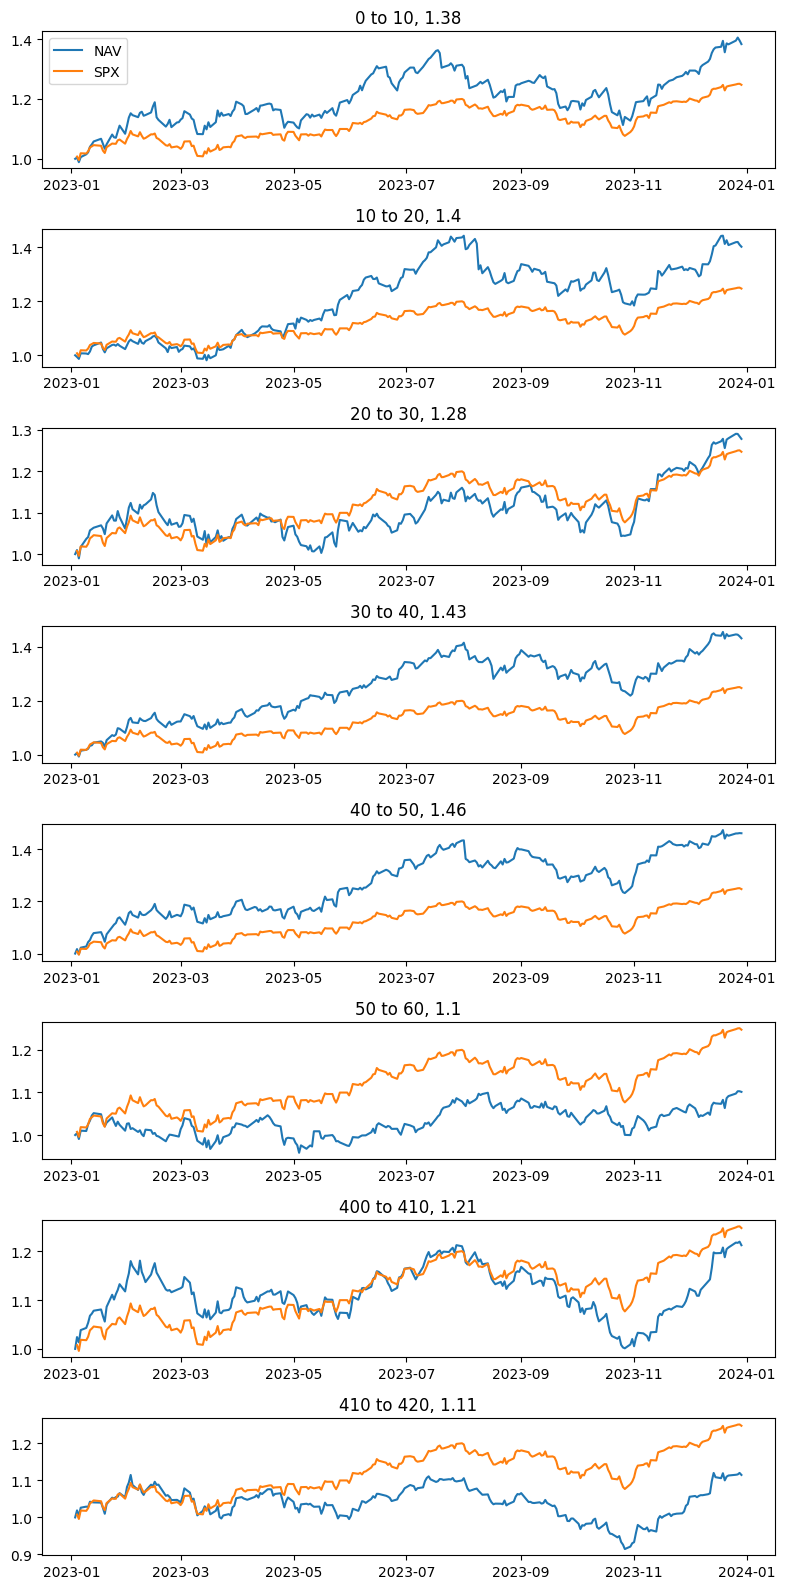

In [280]:
sorted_dict_desc = pd.read_csv("Factor-alpha2018-2022.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
print(sorted_dict_desc)
fig, ax = plt.subplots(8, 1,figsize=(8, 16))
draw_iter_nums_holdings(ax=ax, sorted_dict_desc=sorted_dict_desc, start="2023-01-01", end='2024-01-01', holding_nums=10)

In [283]:
sorted_return = nav_iter_nums_holdings(sorted_dict_desc, start='2023-01-01', end='2024-01-01')
sorted_return
# 結果：alpha前50大平均效果最好

{(40, 'to', 50): 1.4614698220086833,
 (30, 'to', 40): 1.4318351375630134,
 (10, 'to', 20): 1.402298937462816,
 (460, 'to', 470): 1.393536493268473,
 (0, 'to', 10): 1.3832951261950157,
 (80, 'to', 90): 1.3068677779898916,
 (270, 'to', 280): 1.2997894141393675,
 (100, 'to', 110): 1.2956710673582825,
 (60, 'to', 70): 1.2886722988266552,
 (20, 'to', 30): 1.2783942162103334,
 (250, 'to', 260): 1.2603905783446199,
 (370, 'to', 380): 1.2564968090788033,
 (300, 'to', 310): 1.2471846488533038,
 (70, 'to', 80): 1.2444808881935883,
 (290, 'to', 300): 1.2147971315653612,
 (400, 'to', 410): 1.2121083080687642,
 (350, 'to', 360): 1.1915948273879842,
 (440, 'to', 450): 1.1904664970194534,
 (90, 'to', 100): 1.1871860153526463,
 (340, 'to', 350): 1.1630049556702828,
 (430, 'to', 440): 1.1611676232098092,
 (330, 'to', 340): 1.1558488229049777,
 (110, 'to', 120): 1.1523836850231506,
 (420, 'to', 430): 1.1488749192444143,
 (260, 'to', 270): 1.1430241956865586,
 (200, 'to', 210): 1.1362861009211256,
 (150,

2017 performance

['ENPH', 'ETSY', 'AXON', 'TSLA', 'MTCH', 'LRCX', 'GNRC', 'FTNT', 'DXCM', 'DECK', 'PODD', 'ON', 'AMAT', 'RMD', 'EPAM', 'TER', 'NVDA', 'ODFL', 'KLAC', 'ALGN', 'EXR', 'MU', 'MOH', 'LLY', 'MPWR', 'CZR', 'NOW', 'ANET', 'KEYS', 'MSCI', 'ZBRA', 'CF', 'PAYC', 'LYV', 'AMD', 'BLDR', 'NEE', 'CDNS', 'CPRT', 'POOL', 'ZTS', 'F', 'CDW', 'CNC', 'NRG', 'AJG', 'MSFT', 'EL', 'PWR', 'TMO', 'MSI', 'AVGO', 'SBAC', 'IDXX', 'WST', 'DHR', 'PGR', 'DE', 'LULU', 'CBRE', 'NVR', 'DPZ', 'TT', 'AWK', 'INTU', 'STX', 'CME', 'BX', 'STE', 'TECH', 'AMT', 'ELV', 'CRL', 'NFLX', 'ABT', 'COST', 'SCHW', 'DG', 'LIN', 'NEM', 'JBL', 'MKTX', 'KDP', 'CSGP', 'MAA', 'PLD', 'AAPL', 'SNPS', 'EXPD', 'NDAQ', 'AVY', 'ABBV', 'AZO', 'BRO', 'TYL', 'UNH', 'SHW', 'GM', 'ADP', 'CAT', 'CPT', 'MLM', 'TXN', 'PANW', 'TSCO', 'J', 'PHM', 'HPQ', 'TGT', 'NTAP', 'GRMN', 'ISRG', 'CTRA', 'ADBE', 'BIO', 'MCD', 'MTD', 'PSA', 'GOOG', 'FCX', 'FITB', 'HD', 'IPG', 'CCI', 'HCA', 'LW', 'AES', 'GOOGL', 'AEE', 'CHD', 'EXC', 'SPGI', 'DHI', 'RVTY', 'IRM', 'NUE', 'TTW

{(450, 'to', 460): 1.160466116796209,
 (430, 'to', 440): 1.1395474814874562,
 (380, 'to', 390): 1.127160447803957,
 (400, 'to', 410): 1.067669121135248,
 (340, 'to', 350): 1.0357445008412152,
 (350, 'to', 360): 1.0289974020517332,
 (210, 'to', 220): 1.0217420999284907,
 (280, 'to', 290): 1.0145859215975033,
 (250, 'to', 260): 1.0008302128182824,
 (460, 'to', 470): 0.9998458572782859,
 (290, 'to', 300): 0.9883828455074233,
 (410, 'to', 420): 0.9881955519117986,
 (310, 'to', 320): 0.9858153590304862,
 (330, 'to', 340): 0.9698705944084407,
 (260, 'to', 270): 0.9698154138298947,
 (270, 'to', 280): 0.9540123072146344,
 (200, 'to', 210): 0.9475778903099099,
 (90, 'to', 100): 0.9277711931129732,
 (440, 'to', 450): 0.9253985587650865,
 (230, 'to', 240): 0.9228561424979398,
 (120, 'to', 130): 0.9172692389809155,
 (130, 'to', 140): 0.9128427125063919,
 (170, 'to', 180): 0.9111300104474254,
 (320, 'to', 330): 0.9077730072679159,
 (180, 'to', 190): 0.9030077207755087,
 (140, 'to', 150): 0.90099875

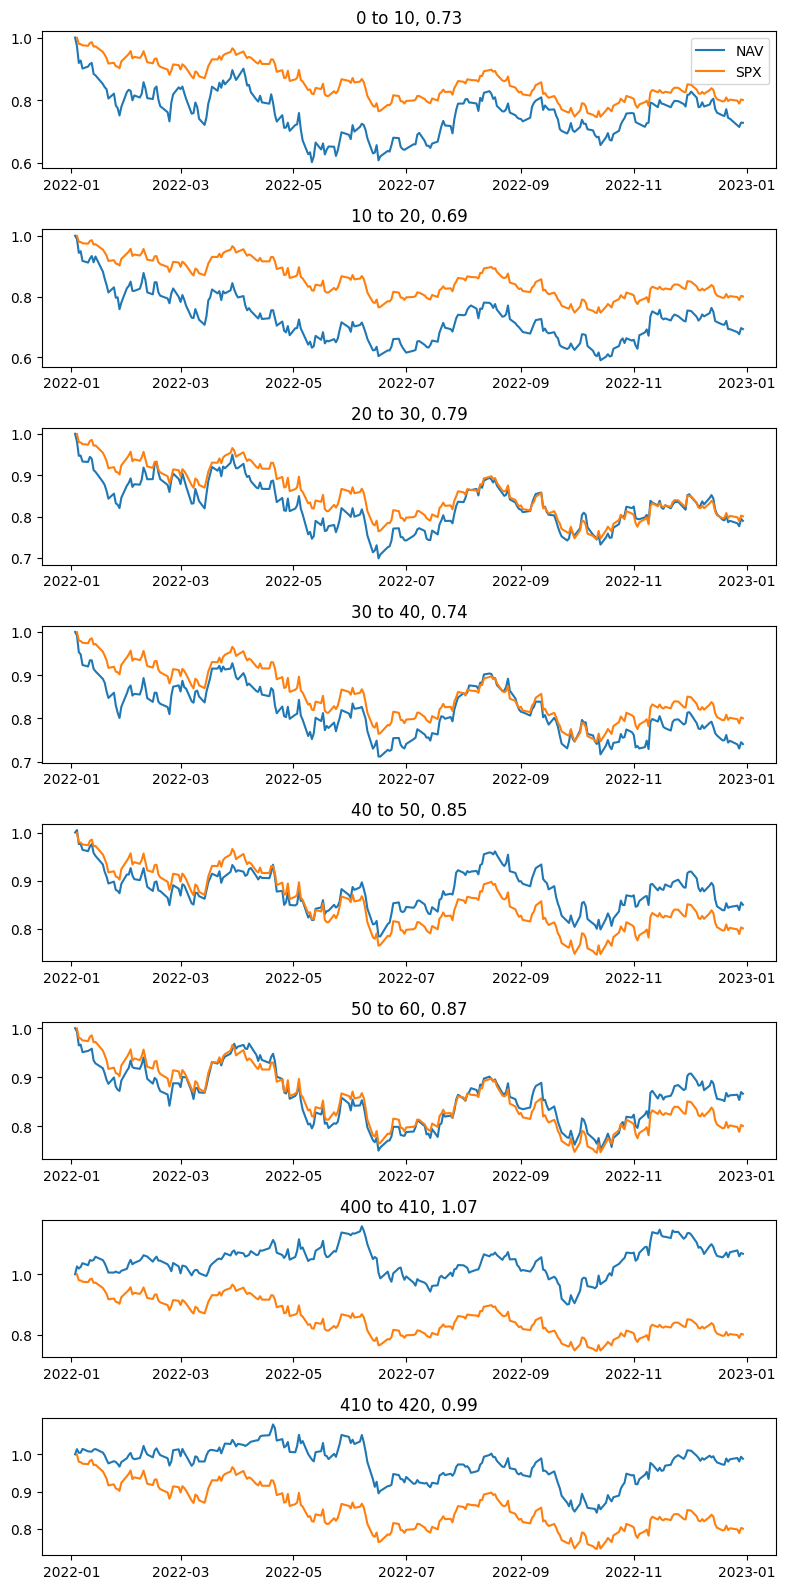

In [29]:
sorted_dict_desc = pd.read_csv("Factor_Alpha_2017_2021.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
print(sorted_dict_desc)
fig, ax = plt.subplots(8, 1,figsize=(8, 16))
draw_iter_nums_holdings(ax=ax, sorted_dict_desc=sorted_dict_desc, start="2022-01-01", end="2022-12-31", holding_nums=10)
sorted_return = nav_iter_nums_holdings(sorted_dict_desc, start='2022-01-01', end='2022-12-31')
sorted_return
# 結果：alpha前50大平均效果最好

###2024 performance

['ENPH', 'SMCI', 'MRNA', 'TSLA', 'NVDA', 'BLDR', 'AXON', 'LLY', 'PWR', 'AMD', 'MPWR', 'KLAC', 'CDNS', 'DECK', 'SNPS', 'FICO', 'MCK', 'LRCX', 'ON', 'DXCM', 'ODFL', 'URI', 'JBL', 'ANET', 'PANW', 'EQT', 'FTNT', 'AVGO', 'TRGP', 'FSLR', 'AMAT', 'HES', 'STLD', 'CMG', 'BX', 'MOH', 'REGN', 'PGR', 'AAPL', 'HUBB', 'NOW', 'COR', 'FCX', 'APA', 'ACGL', 'COST', 'HWM', 'AJG', 'ETN', 'MSCI', 'DHI', 'PHM', 'PODD', 'AZO', 'MSFT', 'NUE', 'GNRC', 'MPC', 'TT', 'VRTX', 'WST', 'AMP', 'DVN', 'CPRT', 'LULU', 'LEN', 'MLM', 'TMUS', 'CAH', 'IRM', 'TER', 'IT', 'TDG', 'CTAS', 'PCAR', 'TSCO', 'MU', 'ABBV', 'DE', 'CDW', 'IR', 'BG', 'GE', 'POOL', 'BBWI', 'EPAM', 'GIS', 'WRB', 'GWW', 'MSI', 'STX', 'CF', 'CTRA', 'NXPI', 'EQIX', 'IDXX', 'PH', 'QCOM', 'GEN', 'ORLY', 'INTU', 'UNH', 'KEYS', 'NOC', 'CAT', 'BRO', 'COP', 'CSGP', 'NVR', 'DHR', 'VMC', 'AIZ', 'FANG', 'EXR', 'LDOS', 'LIN', 'MNST', 'META', 'RSG', 'RJF', 'FDS', 'TMO', 'CI', 'HSY', 'MRO', 'FAST', 'J', 'AVY', 'KR', 'TGT', 'ZTS', 'GILD', 'LOW', 'PLD', 'ALL', 'PKG', 'HL

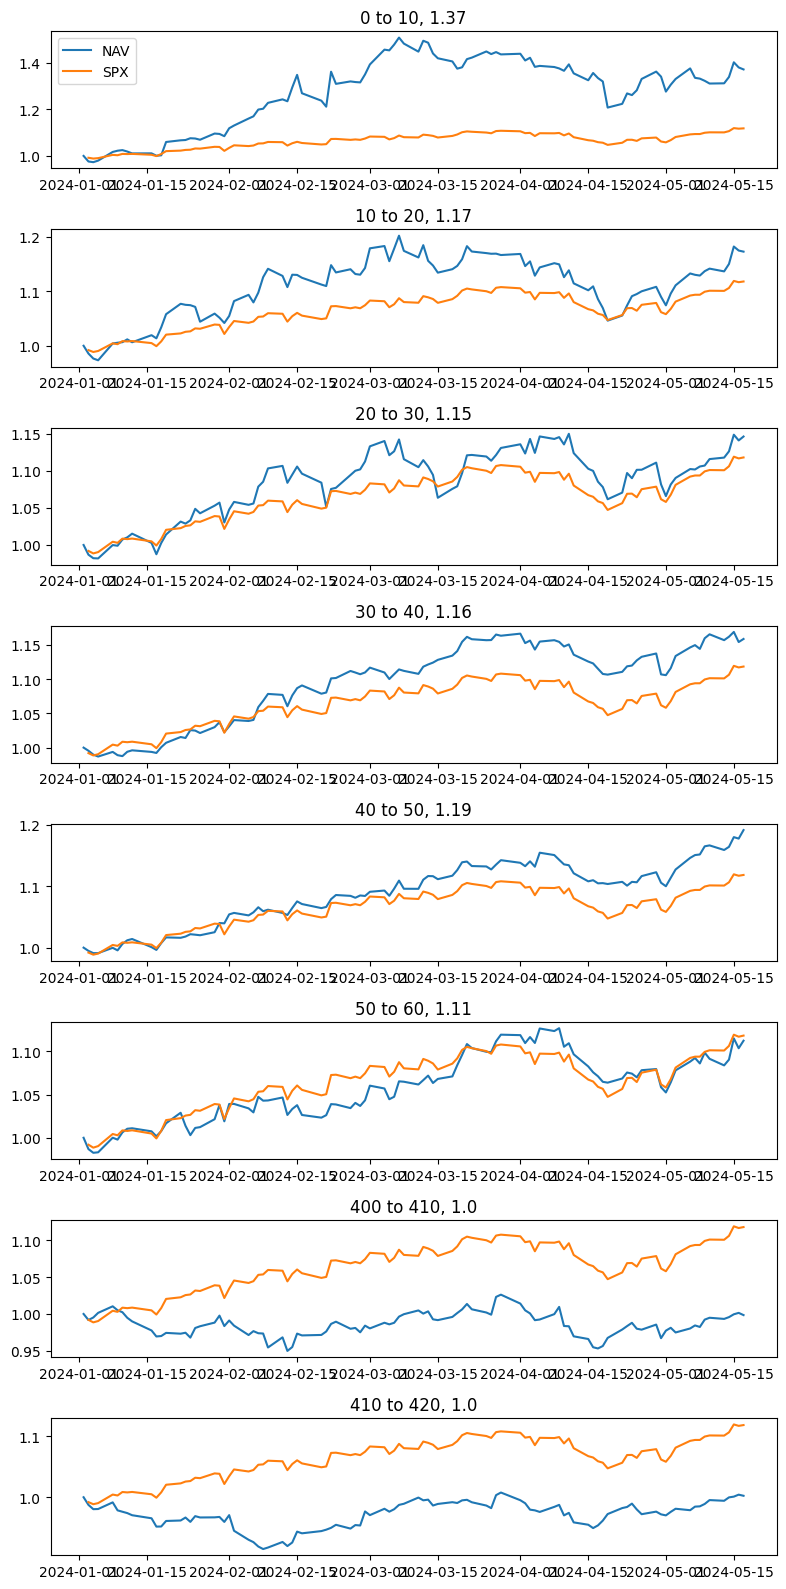

In [17]:
sorted_dict_desc = pd.read_csv("Factor_Alpha_2019_2023.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
print(sorted_dict_desc)
fig, ax = plt.subplots(8, 1,figsize=(8, 16))
draw_iter_nums_holdings(ax=ax, sorted_dict_desc=sorted_dict_desc, start="2024-01-01", end=datetime.now(), holding_nums=10)

['AAL', 'CCL', 'KHC', 'INCY', 'APA', 'NCLH', 'PCG', 'SLB', 'HAL', 'VTRS']


/var/folders/zc/_sy5126x4ks5w74_nsrx_mv40000gp/T/ipykernel_8359/1579552013.py:23: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  nav_all = pd.concat([nav_all, nav_series], axis=0)


['ENPH', 'AXON', 'DXCM', 'ETSY', 'TSLA', 'AMD', 'LLY', 'FTNT', 'DECK', 'APA']
['ENPH', 'SMCI', 'MRNA', 'TSLA', 'NVDA', 'BLDR', 'AXON', 'LLY', 'PWR', 'AMD']


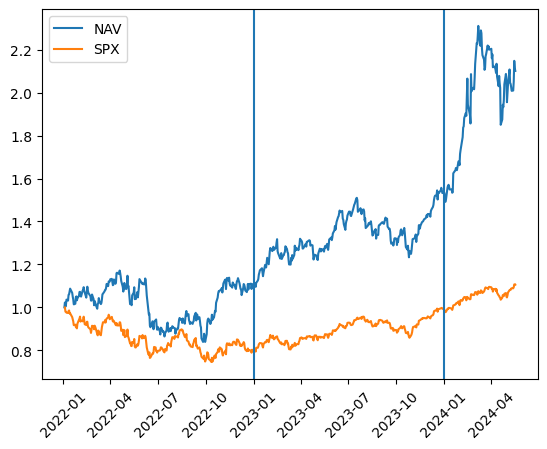

In [37]:

def getNavSeries(df_now_for_nav, weighting, nav_current = 1, short=False):
    if short:
        df2 = (1 - df_now_for_nav.pct_change()).cumprod()
    else:

        df2 = (1 + df_now_for_nav.pct_change()).cumprod()
    # print(df2)
    df3 = df2.fillna(1)
    df4 = df3*nav_current
    nav_series = np.sum(df4 * weighting, axis=1)
    nav = nav_series.iloc[-1]
    return nav_series, nav

nav_all = pd.Series()

sorted_dict_desc = pd.read_csv("Factor_Alpha_2017_2021.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
selection = sorted_dict_desc[-10:]
print(selection)
a = yf.download(selection, start="2022-01-01", end="2022-12-31", progress=False)['Adj Close']
weighting = [1/len(selection)]*len(selection)
nav_series, nav = getNavSeries(a, weighting, 1)
nav_all = pd.concat([nav_all, nav_series], axis=0)

sorted_dict_desc = pd.read_csv("Factor-alpha2018-2022.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
selection = sorted_dict_desc[:10]
print(selection)
a = yf.download(selection, start="2023-01-01", end="2023-12-31", progress=False)['Adj Close']
weighting = [1/len(selection)]*len(selection)
nav_series, nav = getNavSeries(a, weighting, nav)
nav_all = pd.concat([nav_all, nav_series], axis=0)

sorted_dict_desc = pd.read_csv("Factor_Alpha_2019_2023.csv", index_col=[0])
sorted_dict_desc = list(sorted_dict_desc.index)
selection = sorted_dict_desc[:10]
print(selection)
a = yf.download(selection, start="2024-01-01", progress=False)['Adj Close']
weighting = [1/len(selection)]*len(selection)
nav_series, nav1 = getNavSeries(a, weighting, nav)
nav_all = pd.concat([nav_all, nav_series], axis=0)


spx = yf.download("^GSPC",start="2022-01-01", progress=False)['Adj Close']
spx = (1 + spx.pct_change()).cumprod()
plt.plot(nav_all, label='NAV')
plt.plot(spx, label='SPX')
plt.axvline(pd.to_datetime("2024-01-01"))
plt.axvline(pd.to_datetime("2023-01-01"))
plt.legend()
plt.xticks(rotation=45)
plt.show()
# print(nav)

In [12]:
nav_all

2023-01-03    1.000000
2023-01-04    1.004393
2023-01-05    0.988842
2023-01-06    1.005713
2023-01-09    1.015134
                ...   
2023-12-22    2.717411
2023-12-26    2.749437
2023-12-27    2.775780
2023-12-28    2.760058
2023-12-29    2.734696
Length: 500, dtype: float64